# Project – Low-rank approximation techniques

### Topic
Volume maximization for cross approximation

### Authors 
Anna Paulish & Fabio Matti

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import ACA_SPSD, Algorithm1
from src.matrices import get_A1, get_A2, get_A3, get_A4
from src.helpers import volume, ACA_error, max_volume_index_set, ACA_upper_bounds

## Task 1

Set the parameters $n$ and $k$

In [2]:
n = 7
k = 6

Get the matrix $A_1$

In [3]:
A1 = get_A1(n=n)

Find index set using `ACA_SPSD` and using direct search

In [4]:
I_A1_ACA = ACA_SPSD(A1, k=k)
I_A1_max = max_volume_index_set(A1, k=k)

Compare volume for indices obtained with `ACA_SPSD` with maximum volume

In [5]:
vol_A1_ACA = volume(A1[np.ix_(I_A1_ACA, I_A1_ACA)])
vol_A1_max = volume(A1[np.ix_(I_A1_max, I_A1_max)])

print("Volume with ACA_SPSD:   vol(A_1[I_ACA, I_ACA]) = {:.3e}".format(vol_A1_ACA))
print("Maximum volume:         vol(A_1[I_max, I_max]) = {:.3e}".format(vol_A1_max))

Volume with ACA_SPSD:   vol(A_1[I_ACA, I_ACA]) = 1.311e-16
Maximum volume:         vol(A_1[I_max, I_max]) = 1.000e-13


## Task 2

Find index set using `Algorithm1`

In [6]:
I_A1_Alg = Algorithm1(A1, k=k)
vol_A1_Alg = volume(A1[np.ix_(I_A1_Alg, I_A1_Alg)])

print("Volume with Algorithm1: vol(A_1[I_Alg, I_Alg]) = {:.3e}".format(vol_A1_Alg))

Volume with Algorithm1: vol(A_1[I_Alg, I_Alg]) = 1.000e-13


Compare accuracies of the two algorithms

In [7]:
error_A1_ACA = ACA_error(A1, I_A1_ACA, ord='max')
error_A1_Alg = ACA_error(A1, I_A1_Alg, ord='max')

print("Error in max-norm with ACA_SPSD:         error = {:.3e}".format(error_A1_ACA))
print("Error in max-norm with Algorithm1:       error = {:.3e}".format(error_A1_Alg))

Error in max-norm with ACA_SPSD:         error = 4.437e-07
Error in max-norm with Algorithm1:       error = 5.814e-10


## Task 3

Set the parameters $n$ and specify range of $k \in \{1, ..., K\}$

In [8]:
N = 200
K = 100
k_list = np.arange(1, K+1, dtype=int)

Get the matrix $A_2$

In [9]:
A2 = get_A2(n=N)

Plot error progression of cross approximations for $A_2$

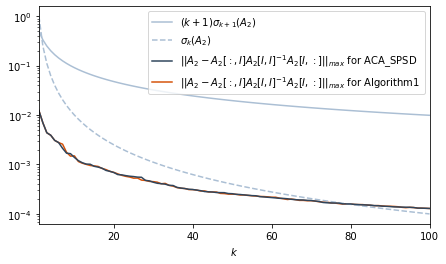

In [10]:
errors_A2_ACA = np.empty(len(k_list))
errors_A2_Alg = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I_A2_ACA = ACA_SPSD(A2, k)
    errors_A2_ACA[idx] = ACA_error(A2, I_A2_ACA, ord='max')
    I_A2_Alg = Algorithm1(A2, k)
    errors_A2_Alg[idx] = ACA_error(A2, I_A2_Alg, ord='max')

upper_bounds_A2, singular_values_A2 = ACA_upper_bounds(A2, k_max=K)

plt.figure(figsize=(7, 4))

plt.plot(k_list, upper_bounds_A2, label="$(k+1)\sigma_{k+1}(A_2)$", c="#ABBFD4")
plt.plot(k_list, singular_values_A2, label = "$\sigma_k(A_2)$", c="#ABBFD4", linestyle = "--")
plt.plot(k_list, errors_A2_ACA, label = "$||A_2 - A_2[:,I]A_2[I,I]^{-1}A_2[I,:]||_{max}$ for ACA_SPSD", c="#2F455C")
plt.plot(k_list, errors_A2_Alg, label = "$||A_2 - A_2[:,I]A_2[I,I]^{-1}A_2[I,:]||_{max}$ for Algorithm1", c="#D55209", zorder=-1)

plt.legend()
plt.yscale('log')
plt.xlim(np.min(k_list), np.max(k_list))
plt.xlabel("$k$")
plt.show()

Get the matrix $A_3$

In [11]:
A3 = get_A3(n=N)

Plot error progression of cross approximations for $A_3$

c:\Users\fabio\Documents\Projects\ACA-SPSD\src\algorithms.py:48: RuntimeWarning: invalid value encountered in double_scalars
  L[pi[m], m] = pow(d[pi[m]], 0.5)


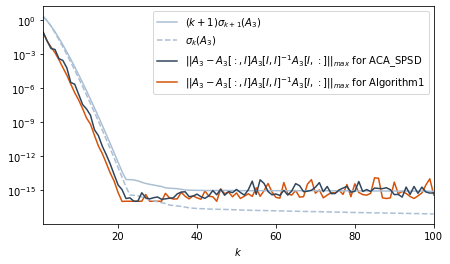

In [12]:
errors_A3_ACA = np.empty(len(k_list))
errors_A3_Alg = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I_A3_ACA = ACA_SPSD(A3, k)
    errors_A3_ACA[idx] = ACA_error(A3, I_A3_ACA, ord='max')
    I_A3_Alg = Algorithm1(A3, k)
    errors_A3_Alg[idx]   = ACA_error(A3, I_A3_Alg, ord='max')

upper_bounds_A3, singular_values_A3 = ACA_upper_bounds(A3, k_max=K)

plt.figure(figsize=(7, 4))

plt.plot(k_list, upper_bounds_A3, label="$(k+1)\sigma_{k+1}(A_3)$", c="#ABBFD4")
plt.plot(k_list, singular_values_A3, label = "$\sigma_k(A_3)$", c="#ABBFD4", linestyle = "--")
plt.plot(k_list, errors_A3_ACA, label = "$||A_3 - A_3[:,I]A_3[I,I]^{-1}A_3[I,:]||_{max}$ for ACA_SPSD", c="#2F455C")
plt.plot(k_list, errors_A3_Alg, label = "$||A_3 - A_3[:,I]A_3[I,I]^{-1}A_3[I,:]||_{max}$ for Algorithm1", c="#D55209", zorder=-1)

plt.legend()
plt.yscale('log')
plt.xlim(np.min(k_list), np.max(k_list))
plt.xlabel("$k$")
plt.show()

## Task 4

Get the counter example $A_4$ for `Algorithm1` returning maximum volume submatrix

In [13]:
A4 = get_A4(epsilon=1e-1)

Demonstrate that `Algorithm1` does not return maximum volume submatrix

In [14]:
I_A4_Alg = Algorithm1(A4, k=2)
I_A4_max = max_volume_index_set(A4, k=2)

vol_A4_Alg = volume(A4[np.ix_(I_A4_Alg, I_A4_Alg)])
vol_A4_max = volume(A4[np.ix_(I_A4_max, I_A4_max)])

print("Volume with Algorithm1: vol(A_1[I_Alg, I_Alg]) = {:.3e}".format(vol_A4_Alg))
print("Maximum volume:         vol(A_1[I_max, I_max]) = {:.3e}".format(vol_A4_max))

Volume with Algorithm1: vol(A_1[I_Alg, I_Alg]) = 9.900e-01
Maximum volume:         vol(A_1[I_max, I_max]) = 1.000e+00
